# Imports

In [1]:
import pandas as pd
import json
import os
import numpy as np
#from load_balance.post_process import plot_box_latency, plot_box_ex_time,plot_box_queu_wait_time,plot_box_queu_wait_time_int,plot_box_latency_int,get_time_outs,extract_qs
from load_balance.post_process import *
import seaborn as sns
sns.set_theme(palette='pastel',color_codes = True, style='white')
import matplotlib.pyplot as plt
import ast


# Wikidata

In [2]:
pre = '/data/wikidata_3_class_full/load_balance10ClientsQPP2'

path_data = {
    'FIFO': f'{pre}/load_balance_FIFO1', 
    'NN-based QPP': f'{pre}/load_balance_NN1', 
    'SVM-based QPP': f'{pre}/load_balance_SVM1', 
    'PlanRGCN': f'{pre}/load_balance_Plan1', 
    'Oracle': f'{pre}/load_balance_Oracle1', 
}
from load_balance.post_process import get_overview_table

def get_overview(path_data):
    overview = get_overview_table(path_data)
    throughput_s = overview.copy()
    throughput_s['Good Queries'] = throughput_s['Good Queries']/7200
    throughput_min = overview.copy()
    throughput_min['Good Queries'] = throughput_min['Good Queries']/120
    return overview, throughput_s, throughput_min
    
overview, throughput_s, throughput_min = get_overview(path_data)

In [3]:
overview

,Good Queries,Time out
FIFO,2006,10
NN-based QPP,2633,6
SVM-based QPP,6020,9
PlanRGCN,5667,7
Oracle,5965,4


In [4]:
print(overview.to_latex())

\begin{tabular}{lrr}
\toprule
 & Good Queries & Time out \\
\midrule
FIFO & 2006 & 10 \\
NN-based QPP & 2633 & 6 \\
SVM-based QPP & 6020 & 9 \\
PlanRGCN & 5667 & 7 \\
Oracle & 5965 & 4 \\
\bottomrule
\end{tabular}



In [5]:
throughput_s
    

,Good Queries,Time out
FIFO,0.278611,10
NN-based QPP,0.365694,6
SVM-based QPP,0.836111,9
PlanRGCN,0.787083,7
Oracle,0.828472,4


In [6]:
throughput_min

,Good Queries,Time out
FIFO,16.716667,10
NN-based QPP,21.941667,6
SVM-based QPP,50.166667,9
PlanRGCN,47.225000,7
Oracle,49.708333,4


In [7]:
def perc_increase(baseline, planrgn):
    return ((planrgn-baseline)/baseline)*100
    
print("FIFO COMPARISON")
perc_increase(throughput_min['Good Queries']['FIFO'],throughput_min['Good Queries']['PlanRGCN'])


FIFO COMPARISON


182.50249252243273

In [8]:
print("SVM COMPARISON")
perc_increase(throughput_min['Good Queries']['SVM-based QPP'],throughput_min['Good Queries']['PlanRGCN'])

SVM COMPARISON


-5.863787375415275

In [9]:
print("NN COMPARISON")
perc_increase(throughput_min['Good Queries']['NN-based QPP'],throughput_min['Good Queries']['PlanRGCN'])

NN COMPARISON


115.22977592100267

In [10]:
print("Oracle COMPARISON - Note the 'True' value is changed to Oracle")
perc_increase(throughput_min['Good Queries']['PlanRGCN'],throughput_min['Good Queries']['Oracle'])

Oracle COMPARISON - Note the 'True' value is changed to Oracle


5.2585142050467635

In [11]:

#fifo22, fifo_timed22 = extract_qs(pathFIFOMU22)
#fifo44, fifo_timed44 = extract_qs(pathFIFOMU22)

#mu22, mu22_timed = extract_qs(pathPlan22)
#mu44, mu44_timed = extract_qs(pathPlan22)

#or22, or22_timed = extract_qs(pathOracle22)
#or44, or44_timed = extract_qs(pathOracle44)
wikidata = {}
for k in path_data.keys():
    wikidata[k]= extract_qs(path_data[k])[0]

In [12]:

get_time_outs(wikidata)

Time outs
FIFO Timeouts : 10
NN-based QPP Timeouts : 6
SVM-based QPP Timeouts : 9
PlanRGCN Timeouts : 7
Oracle Timeouts : 4


{'FIFO': 10, 'NN-based QPP': 6, 'SVM-based QPP': 9, 'PlanRGCN': 7, 'Oracle': 4}

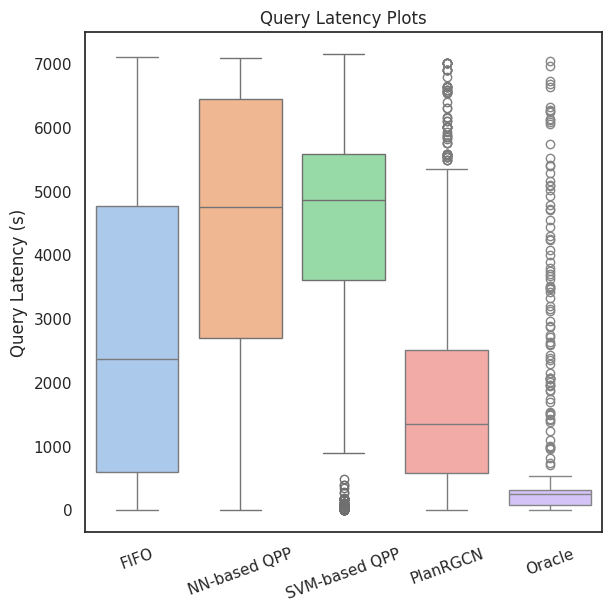

In [13]:

def plot_box_latency(dct, figsize=(6,6)):
    fig, ax = plt.subplots(layout='constrained', figsize=figsize)
    for k in dct.keys():
        ax = sns.boxplot(y=[q['latency'] for q in dct[k]],x=[k for q in dct[k]], ax=ax)
    #ax = sns.boxplot(y=[q['latency'] for q in qpp_lb],x=['PlanRGCN Load Balancer' for q in qpp_lb], ax=ax)
    ax.set_ylabel('Query Latency (s)')
    ax.set_title("Query Latency Plots")
    ax.tick_params(axis='x', rotation=20)
    plt.show()
    
plot_box_latency(wikidata)

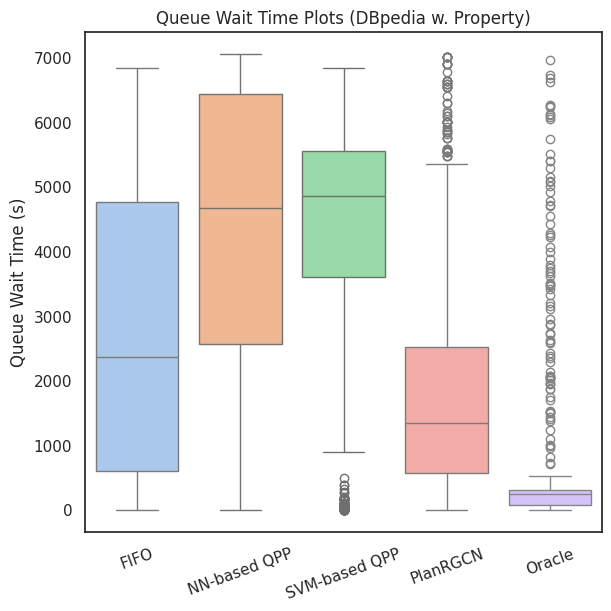

In [14]:

def plot_box_queu_wait_time(dct, figsize=(6,6)):
    fig, ax = plt.subplots(layout='constrained', figsize=figsize)
    for k in dct.keys():
        ax = sns.boxplot(y=[q['queue_wait_time'] for q in dct[k]],x=[k for q in dct[k]], ax=ax)
    ax.set_ylabel('Queue Wait Time (s)')
    ax.set_title("Queue Wait Time Plots (DBpedia w. Property)")
    ax.tick_params(axis='x', rotation=20)
    plt.show()
plot_box_queu_wait_time(wikidata)

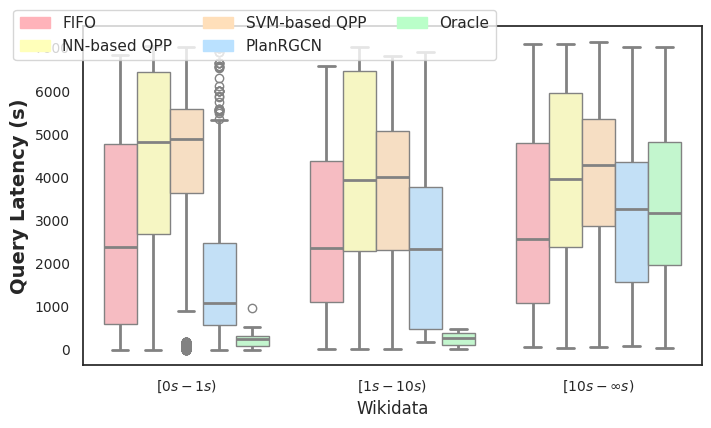

In [15]:
#from load_balance.post_process import plot_box_lat_int_comb
import load_balance.post_process as pp
import importlib
importlib.reload(pp)
plot_box_lat_int_comb = pp.plot_box_lat_int_comb
legend_dict= {
    'bbox_to_anchor':(0, 1.05),
    'ncol':3,
    }
int_to_col = {}
for x in wikidata.keys():
    if 'FIFO' in x:
        int_to_col[x] ='#ffb3ba'
    elif 'Plan' in x:
        int_to_col[x] ='#bae1ff'
    elif 'SVM' in x:
        int_to_col[x] ='#ffdfba'
    elif 'NN' in x:
        int_to_col[x] ='#ffffba'
    elif 'Oracle' in x:
        int_to_col[x] ='#baffc9'
        
#int_to_col = { 'FIFO 1':'#ffb3ba','PlanRGCN 1':'#bae1ff', 'SVM 1':'#ffdfba', 'NN 1':'#ffffba' ,'Oracle 1':'#baffc9'}
save_path = None
plot_box_lat_int_comb( (wikidata,'Wikidata'), 
                      figsize=(7,4), 
                      title='', 
                      time_intervals=['$[0s - 1s)$', '$[1s - 10s)$', '$[10s - \infty s)$'],
                      legend_dict=legend_dict, int_to_col=int_to_col,
                      save_path = save_path,
                      x_label_size=10,
                      x_rotation = 0,
                      y_label_size=10,
                      )

# DBpedia

In [16]:
import pandas as pd
import json
import os
import numpy as np
#from load_balance.post_process import plot_box_latency, plot_box_ex_time,plot_box_queu_wait_time,plot_box_queu_wait_time_int,plot_box_latency_int,get_time_outs,extract_qs
from load_balance.post_process import *
import seaborn as sns
sns.set_theme(palette='pastel',color_codes = True, style='white')
import matplotlib.pyplot as plt
import ast


In [17]:
# Wikidata

In [18]:
pre = '/data/DBpedia_3_class_full/load_balance10ClientsQPP2'

path_data = {
    'FIFO': f'{pre}/load_balance_FIFO1', 
    'NN-based QPP': f'{pre}/load_balance_NN1', 
    'SVM-based QPP': f'{pre}/load_balance_SVM1', 
    'PlanRGCN': f'{pre}/load_balance_Plan1', 
    'Oracle': f'{pre}/load_balance_Oracle1', 
}
from load_balance.post_process import get_overview_table

def get_overview(path_data):
    overview = get_overview_table(path_data)
    throughput_s = overview.copy()
    throughput_s['Good Queries'] = throughput_s['Good Queries']/7200
    throughput_min = overview.copy()
    throughput_min['Good Queries'] = throughput_min['Good Queries']/120
    return overview, throughput_s, throughput_min
    
overview, throughput_s, throughput_min = get_overview(path_data)

In [19]:
overview

,Good Queries,Time out
FIFO,717,59
NN-based QPP,1753,60
SVM-based QPP,894,30
PlanRGCN,2203,40
Oracle,2898,17


In [20]:
print(overview.to_latex())

\begin{tabular}{lrr}
\toprule
 & Good Queries & Time out \\
\midrule
FIFO & 717 & 59 \\
NN-based QPP & 1753 & 60 \\
SVM-based QPP & 894 & 30 \\
PlanRGCN & 2203 & 40 \\
Oracle & 2898 & 17 \\
\bottomrule
\end{tabular}



In [21]:
throughput_s
    

,Good Queries,Time out
FIFO,0.099583,59
NN-based QPP,0.243472,60
SVM-based QPP,0.124167,30
PlanRGCN,0.305972,40
Oracle,0.402500,17


In [22]:
throughput_min

,Good Queries,Time out
FIFO,5.975000,59
NN-based QPP,14.608333,60
SVM-based QPP,7.450000,30
PlanRGCN,18.358333,40
Oracle,24.150000,17


In [23]:
print("FIFO COMPARISON")
perc_increase(throughput_min['Good Queries']['FIFO'],throughput_min['Good Queries']['PlanRGCN'])

FIFO COMPARISON


207.25244072524413

In [24]:
print("SVM COMPARISON")
perc_increase(throughput_min['Good Queries']['SVM-based QPP'],throughput_min['Good Queries']['PlanRGCN'])

SVM COMPARISON


146.420581655481

In [25]:
print("NN COMPARISON")
perc_increase(throughput_min['Good Queries']['NN-based QPP'],throughput_min['Good Queries']['PlanRGCN'])

NN COMPARISON


25.670279520821467

In [26]:
print("Oracle COMPARISON - Note the 'True' value is changed to Oracle")
perc_increase(throughput_min['Good Queries']['PlanRGCN'],throughput_min['Good Queries']['Oracle'])

Oracle COMPARISON - Note the 'True' value is changed to Oracle


31.54788924194279

In [27]:

#fifo22, fifo_timed22 = extract_qs(pathFIFOMU22)
#fifo44, fifo_timed44 = extract_qs(pathFIFOMU22)

#mu22, mu22_timed = extract_qs(pathPlan22)
#mu44, mu44_timed = extract_qs(pathPlan22)

#or22, or22_timed = extract_qs(pathOracle22)
#or44, or44_timed = extract_qs(pathOracle44)
dbpedia = {}
for k in path_data.keys():
    dbpedia[k]= extract_qs(path_data[k])[0]

In [28]:

get_time_outs(dbpedia)

Time outs
FIFO Timeouts : 59
NN-based QPP Timeouts : 60
SVM-based QPP Timeouts : 30
PlanRGCN Timeouts : 40
Oracle Timeouts : 17


{'FIFO': 59,
 'NN-based QPP': 60,
 'SVM-based QPP': 30,
 'PlanRGCN': 40,
 'Oracle': 17}

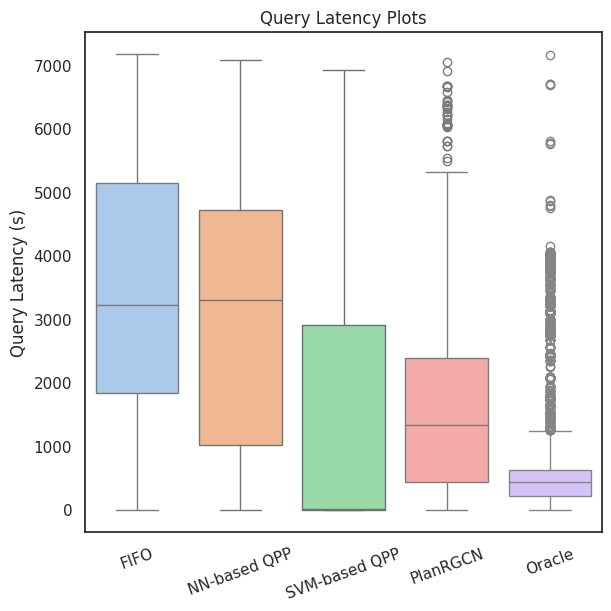

In [29]:

def plot_box_latency(dct, figsize=(6,6)):
    fig, ax = plt.subplots(layout='constrained', figsize=figsize)
    for k in dct.keys():
        ax = sns.boxplot(y=[q['latency'] for q in dct[k]],x=[k for q in dct[k]], ax=ax)
    #ax = sns.boxplot(y=[q['latency'] for q in qpp_lb],x=['PlanRGCN Load Balancer' for q in qpp_lb], ax=ax)
    ax.set_ylabel('Query Latency (s)')
    ax.set_title("Query Latency Plots")
    ax.tick_params(axis='x', rotation=20)
    plt.show()
    
plot_box_latency(dbpedia)

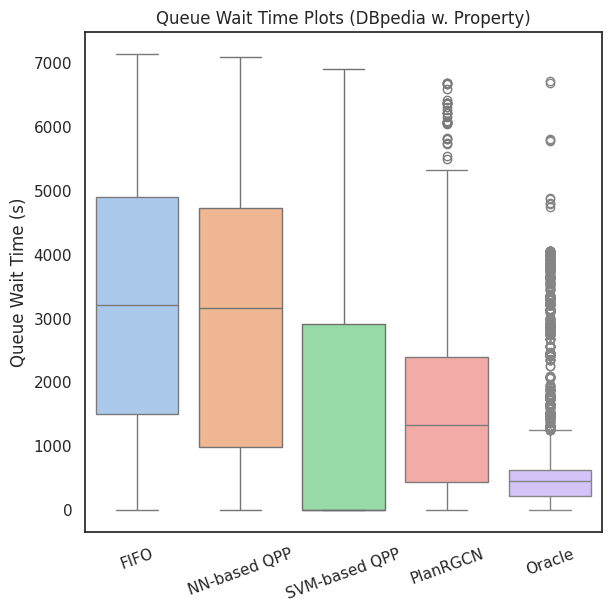

In [30]:

def plot_box_queu_wait_time(dct, figsize=(6,6)):
    fig, ax = plt.subplots(layout='constrained', figsize=figsize)
    for k in dct.keys():
        ax = sns.boxplot(y=[q['queue_wait_time'] for q in dct[k]],x=[k for q in dct[k]], ax=ax)
    ax.set_ylabel('Queue Wait Time (s)')
    ax.set_title("Queue Wait Time Plots (DBpedia w. Property)")
    ax.tick_params(axis='x', rotation=20)
    plt.show()
plot_box_queu_wait_time(dbpedia)

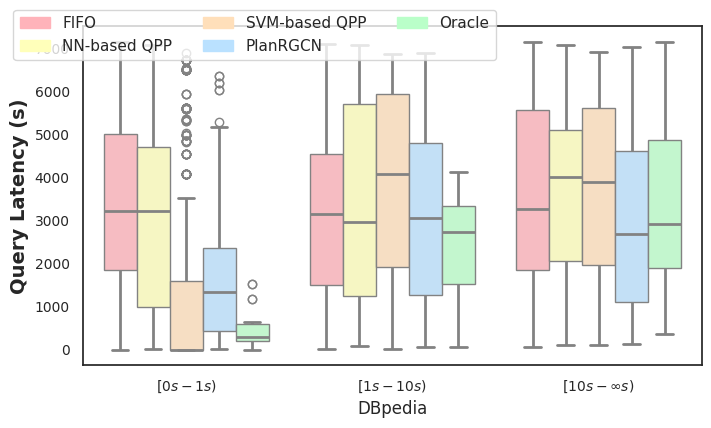

In [31]:
#from load_balance.post_process import plot_box_lat_int_comb
import load_balance.post_process as pp
import importlib
importlib.reload(pp)
plot_box_lat_int_comb = pp.plot_box_lat_int_comb
legend_dict= {
    'bbox_to_anchor':(0, 1.05),
    'ncol':3,
    }
#
int_to_col = {}
for x in dbpedia.keys():
    if 'FIFO' in x:
        int_to_col[x] ='#ffb3ba'
    elif 'Plan' in x:
        int_to_col[x] ='#bae1ff'
    elif 'SVM' in x:
        int_to_col[x] ='#ffdfba'
    elif 'NN' in x:
        int_to_col[x] ='#ffffba'
    elif 'Oracle' in x:
        int_to_col[x] ='#baffc9'
        
#int_to_col = { 'FIFO 1':'#ffb3ba','PlanRGCN 1':'#bae1ff', 'SVM 1':'#ffdfba', 'NN 1':'#ffffba' ,'Oracle 1':'#baffc9'}
save_path = None
plot_box_lat_int_comb( (dbpedia,'DBpedia'), 
                      figsize=(7,4), 
                      title='', 
                      time_intervals=['$[0s - 1s)$', '$[1s - 10s)$', '$[10s - \infty s)$'],
                      legend_dict=legend_dict, int_to_col=int_to_col,
                      save_path = save_path,
                      x_label_size=10,
                      x_rotation = 0,
                      y_label_size=10,
                      )

Besides the average latency per class we also investigate the workload throughput.
Given that the time budget aspect of the workload, it does not make sense to look at the workload latency, because it is not the same type of queries.

# Combined Query Latency Chart

{'FIFO': '*', 'NN-based QPP': 'O', 'SVM-based QPP': '.', 'PlanRGCN': '/', 'Oracle': '\\'}


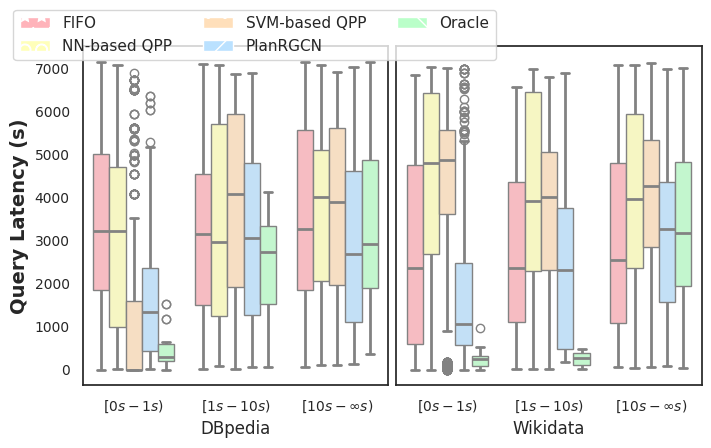

In [32]:
#from load_balance.post_process import plot_box_lat_int_comb
import load_balance.post_process as pp
import importlib
importlib.reload(pp)
plot_box_lat_int_comb = pp.plot_box_lat_int_comb
legend_dict= {
    'bbox_to_anchor':(0, 1.10),
    'ncol':3,
    }
int_to_col = {}
int_to_hatch = {}
keys = list(dbpedia.keys())
keys.extend(list(wikidata.keys()))
for x in keys:
    if 'FIFO' in x:
        int_to_col[x] ='#ffb3ba'
        int_to_hatch[x] ='*'
    elif 'Plan' in x:
        int_to_col[x] ='#bae1ff'
        int_to_hatch[x] ='/'
    elif 'SVM' in x:
        int_to_col[x] ='#ffdfba'
        int_to_hatch[x] ='.'
    elif 'NN' in x:
        int_to_col[x] ='#ffffba'
        int_to_hatch[x] ='O'
    elif 'Oracle' in x:
        int_to_col[x] ='#baffc9'
        int_to_hatch[x] ='\\'
        
#int_to_col = { 'FIFO 1':'#ffb3ba','PlanRGCN 1':'#bae1ff', 'SVM 1':'#ffdfba', 'NN 1':'#ffffba' ,'Oracle 1':'#baffc9'}
save_path = '/data/query_lat_comb.pdf'
plot_box_lat_int_comb((dbpedia,'DBpedia'), (wikidata,'Wikidata'), 
                      figsize=(7,4), 
                      title='', 
                      time_intervals=['$[0s - 1s)$', '$[1s - 10s)$', '$[10s - \infty s)$'],
                      legend_dict=legend_dict, int_to_col=int_to_col,
                      hatch_dict = int_to_hatch,
                      save_path = save_path,
                      x_label_size=10,
                      x_rotation = 0,
                      y_label_size=10,
                      )

ValueError: The number of FixedLocator locations (6), usually from a call to set_ticks, does not match the number of labels (3).

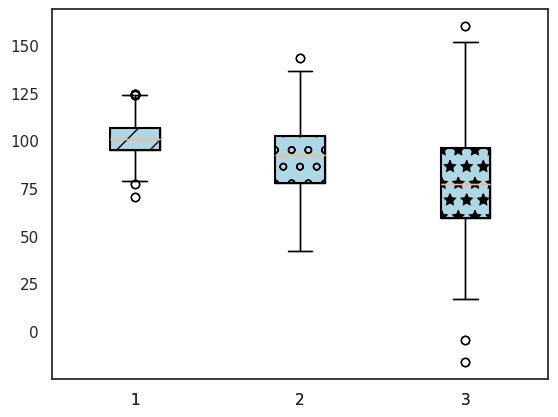

In [33]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(10)
data1 = np.random.normal(100, 10, 200)
data2 = np.random.normal(90, 20, 200)
data3 = np.random.normal(80, 30, 200)
fig, ax = plt.subplots()
ax.boxplot([data1, data2, data3], positions=[1, 2, 3])
# Enable patch_artist for boxplot
bp = ax.boxplot([data1, data2, data3], patch_artist=True, positions=[1, 2, 3])

# Iterate over boxes and set a different hatch for each
patterns = ['/', 'o', '*']
for i, box in enumerate(bp['boxes']):
    box.set(color='black', linewidth=1.5)  # Set color and linewidth of the box edges
    box.set(facecolor='lightblue')  # Set color of the box fill
    box.set(hatch=patterns[i])  # Set the hatch pattern

# Add labels and title
ax.set_xticklabels(['Group 1', 'Group 2', 'Group 3'])
ax.set_xlabel('Groups')
ax.set_ylabel('Values')
ax.set_title('Boxplot with Patterns')

plt.show()

In [ ]:
#Check runtime intervals "oracle" in the load balance latencies
#from load_balance.post_process import get_latency_bxp_data

"""def check_interval_change(dct):
    load_balancer, runtime_interval, latencies = get_latency_bxp_data(
            dct, time_intervals
        )
"""    
#check_interval_change(wikidata)

In [34]:
dbpedia.keys()

dict_keys(['FIFO', 'NN-based QPP', 'SVM-based QPP', 'PlanRGCN', 'Oracle'])

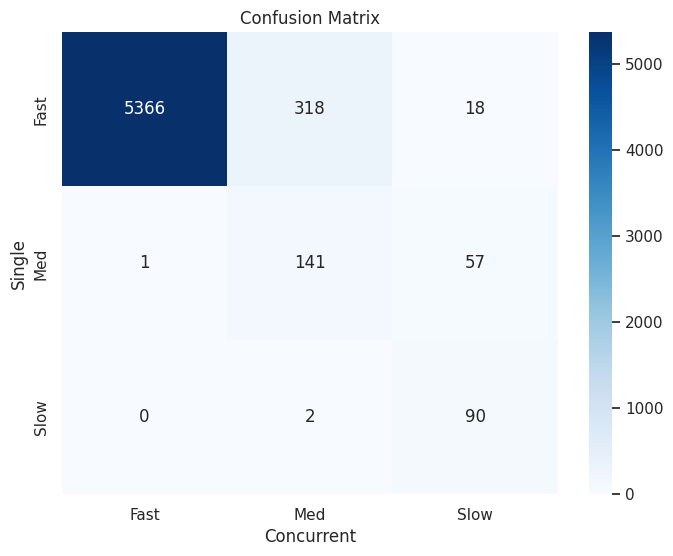

In [44]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def cls_func(lat):
    vec = np.zeros(3)
    if lat < 1:
        vec[0] = 1
    elif (1 < lat) and (lat < 10):
        vec[1] = 1
    elif 10 < lat:
        vec[2] = 1
    return vec

tcls_func = lambda x: np.argmax(cls_func(x))

dbpedia['Oracle']


class OracleAnalyzer:
    def __init__(self, oracle_dict:dict, cls_func):
        self.oracle_dict = oracle_dict
        self.cls_func = cls_func
        self.sing_ex_interval = None
        self.ex_time = None
        
    def load_intervals_data(self):
        self.sing_ex_interval = []
        self.ex_time = []
        for q in self.oracle_dict:
            self.sing_ex_interval.append(q['true_interval'])
            self.ex_time.append(self.cls_func(q['ex_time']))
    
    def matrix_interval_changes(self):
        """Requires load_intervals_data"""
        assert self.sing_ex_interval != None and self.ex_time!= None
        matrix = confusion_matrix(self.sing_ex_interval, self.ex_time)
        plt.figure(figsize=(8, 6))
        sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Fast', 'Med', 'Slow'], yticklabels=['Fast', 'Med', 'Slow'])
        plt.xlabel('Concurrent')
        plt.ylabel('Single')
        plt.title('Confusion Matrix')
        plt.show()
        
        
            
oracle_analysis = OracleAnalyzer(wikidata['Oracle'], tcls_func)
oracle_analysis.load_intervals_data()
oracle_analysis.matrix_interval_changes()
